# Course Description
It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions. Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. In this course, you will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more!

## 13.1// Common data problems
### 13.1.// Data type constraints
#### Exercise

In [2]:
import pandas as pd
ride_sharing=pd.read_csv('G:\\datacamp\\13. Cleaning Data in Python\\New folder\\ride_sharing_new.csv')
# Print the information of ride_sharing
print(ride_sharing.info())
display(ride_sharing)
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.

In [2]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == ('category')

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


#### Summing strings and concatenating numbers
In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

In [3]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### 13.1.3 Data Range Constraints
#### Tire size constraints
In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes

In [4]:
print(ride_sharing.info())
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing["tire_sizes"] > 27,"tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing["tire_sizes"].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
 10  duration_trim    25760 non-null  object
 11  duration_time    25760 non-null  int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 2.3+ MB
None


KeyError: 'tire_sizes'

#### Back to the future
A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

In [5]:
import datetime as dt

today = dt.date.today()
print(today)


# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date#####ride_dt te shb datetime ar ride_date e object########

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2022-11-21


KeyError: 'ride_date'

## 13.1.3 Uniqueness cONSTRAINTS
### Finding duplicates
A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In [11]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='bike_id', keep=False)   ####ride_idd
duplicates

0        True
1        True
2        True
3        True
4        True
         ... 
25755    True
25756    True
25757    True
25758    True
25759    True
Length: 25760, dtype: bool

In [9]:
# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')
display(duplicated_rides.head())
# Print relevant columns of duplicated_rides
display(duplicated_rides[['bike_id','duration_time','user_birth_year']])

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,duration_trim,duration_time
3638,3638,12 minutes,22,Howard St at Beale St,350,8th St at Brannan St,11,1,1988,Female,12,12
6088,6088,5 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,63,Bryant St at 6th St,11,2,1985,Male,5,5
10857,10857,4 minutes,3,Powell St BART Station (Market St at 4th St),47,4th St at Harrison St,11,1,1987,Male,4,4
10045,10045,13 minutes,3,Powell St BART Station (Market St at 4th St),112,Harrison St at 17th St,27,3,1989,Male,13,13
16104,16104,10 minutes,22,Howard St at Beale St,30,San Francisco Caltrain (Townsend St at 4th St),27,2,1970,Male,10,10


,bike_id,duration_time,user_birth_year
3638,11,12,1988
6088,11,5,1985
10857,11,4,1987
10045,27,13,1989
16104,27,10,1970
...,...,...,...
8812,6638,10,1986
6815,6638,5,1995
8456,6638,7,1983
8300,6638,6,1962


#### Treating duplicates
In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.



In [12]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

KeyError: 'ride_id'

## 13.2// Text and categorical data problems
### 13.2.1//Membership constraints(categoical)
#### Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

In [13]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\hp\\Desktop\\py3_ag\\3+4__\\4. Joining Data with pandas': ['.ipynb_checkpoints', '10.Intermediate Data Visualization with Seaborn.ipynb', '10_2.Data Communication Concepts.ipynb', '11. Introduction to Importing Data in Python.ipynb', '12. Intermediate Importing Data in Python.ipynb', '13.Cleaning Data in Python.ipynb', '15.Writing Functions in Python.ipynb', '16. Exploratory Data Analysis in Python!.ipynb', '19.Sampling in Python.ipynb', '20.Hypothesis testing with python.ipynb', '4.Joining Data with pandas-Copy1.ipynb', '4.Joining Data with pandas.ipynb', '5.Introduction to data visualization with Matplotlib.ipynb', '6. Introduction to Data Visualization with Seaborn.ipynb', '6_6 Introduction to Statistics.ipynb', '7. Introduction to NumPy.ipynb', '8. Data Science Toolbox(1).ipynb', '9. Data Science Toolbox(2).ipynb', 'Chinook.sqlite', 'darker_monet.npy', 'DATA SCIENCE TOOLBOX(1) PRACTICES.ipynb', 'sports_Weight.png', 'sports_weights.png', 'taxi_owners.p', 'winequ

In [14]:
from pathlib import Path

airlines=pd.read_csv('G:\\datacamp\\13. Cleaning Data in Python\\New folder\\airlines_final.csv')
categories_xlsx=pd.ExcelFile('G:\\datacamp\\13. Cleaning Data in Python\\New folder\\Categories_2.xlsx')
categories=categories_xlsx.parse('Sheet1')
print(categories)
#categories=open(Path(r"G:\\datacamp\\13. Cleaning Data in Python\\New folder\\Categories.csv"))
#categories=open('G:/datacamp/13. Cleaning Data in Python/New folder/Categories.csv')

      cleanliness safety                    satisfaction
0           Clean           Neural        Very satisfied
1         Average             Safe    Somewhat satisfied
2  Somewhat Clean    Somewhat safe               Neutral
3  Somewhat Dirty      Very unsafe       Very unsatisfid
4           Dirty  Somewhat unsafe  Somewhat unsatisfied
5             NaN              NaN    Somewhat satsified


In [17]:

# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
display('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
display('Safety: ', airlines['safety'].unique(), "\n")
display('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

print('*********')
# Find the cleanliness category in airlines not in categories
 #cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
cat_satisfaction = set(airlines['satisfaction']).difference(categories['satisfaction'])
display(cat_satisfaction)
# Find rows with that category
#cat_clean_rows = airlines['cleanliness'].isin(cat_clean)
cat_satisfaction_rows=airlines['satisfaction'].isin(cat_satisfaction)

# Print rows with inconsistent category

print('******************cat_satisfaction_rows******************')
#print(airlines[cat_clean_rows])
display(airlines[cat_satisfaction_rows])




      cleanliness safety                    satisfaction
0           Clean           Neural        Very satisfied
1         Average             Safe    Somewhat satisfied
2  Somewhat Clean    Somewhat safe               Neutral
3  Somewhat Dirty      Very unsafe       Very unsatisfid
4           Dirty  Somewhat unsafe  Somewhat unsatisfied
5             NaN              NaN    Somewhat satsified


'Cleanliness: '

array(['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
      dtype=object)

'\n'

'Safety: '

array(['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe',
       'Somewhat unsafe'], dtype=object)

'\n'

'Satisfaction: '

array(['Very satisfied', 'Neutral', 'Somewhat satsified',
       'Somewhat unsatisfied', 'Very unsatisfied'], dtype=object)

'\n'

*********


{'Very unsatisfied'}

******************cat_satisfaction_rows******************


,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
511,586,2920,Thursday,DELTA,SEATTLE,West US,Hub,Gates 40-48,2018-12-31,180.0,Dirty,Neutral,Very unsatisfied
667,762,2640,Tuesday,JETBLUE,NEW YORK-JFK,EAST US,Hub,Gates 1-12,2018-12-31,113.0,Average,Somewhat safe,Very unsatisfied
1221,1396,725,Thursday,AIR FRANCE/KLM,PARIS-DE GAULLE,eur,Hub,Gates 1-12,2018-12-31,215.0,Clean,Somewhat safe,Very unsatisfied
2158,2464,3209,Tuesday,UNITED,SANTA BARBARA,West US,Small,Gates 70-90,2018-12-31,35.0,Average,Somewhat safe,Very unsatisfied


In [18]:


print('*****consistent category****')
# Print rows with consistent categories only
print(airlines[~cat_satisfaction_rows])

*****consistent category****
      Unnamed: 0    id        day        airline        destination  \
0              0  1351    Tuesday    UNITED INTL             KANSAI   
1              1   373     Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820   Thursday          DELTA        LOS ANGELES   
3              3  1157    Tuesday      SOUTHWEST        LOS ANGELES   
4              4  2992  Wednesday       AMERICAN              MIAMI   
...          ...   ...        ...            ...                ...   
2472        2804  1475    Tuesday         ALASKA       NEW YORK-JFK   
2473        2805  2222   Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684     Friday         UNITED            ORLANDO   
2475        2807  2549    Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162   Saturday  CHINA EASTERN            QINGDAO   

        dest_region dest_size boarding_area   dept_time  wait_min  \
0              Asia       Hub  Gates 91-102  2018

**SEE_EXERCISE_FILE_NOT_SAME up** 

In [ ]:
print(airlines.info())

#### Inconsistent categories
In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In [19]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.

The dest_size column has only inconsistent values due to leading and trailing spaces.

#### Remapping categories
To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.

In [ ]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday','Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

print(airlines)

### 12.2.3// Containing Text Data
#### Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")


# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

#### Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

In [20]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()
print(resp_length)
# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

KeyError: 'survey_response'

## 13.3 Advanced Data Problem
### 13.3.1 Uniformity
#### Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

###### Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
###### Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
###### Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'

In [21]:
banking=pd.read_csv('G:\\datacamp\\13. Cleaning Data in Python\\New folder\\banking_dirty.csv')
print(banking.columns)
display(banking)

Index(['Unnamed: 0', 'cust_id', 'birth_date', 'Age', 'acct_amount',
       'inv_amount', 'fund_A', 'fund_B', 'fund_C', 'fund_D', 'account_opened',
       'last_transaction'],
      dtype='object')


,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [22]:
banking['acct_cur']=['dollar', 'dollar', 'dollar', 'euro', 'euro', 'dollar', 'dollar', 'euro',
 'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'dollar',
 'euro', 'euro', 'dollar', 'euro', 'dollar', 'dollar', 'euro', 'euro', 'euro',
 'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar',
 'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'euro', 'dollar', 'dollar', 'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'dollar', 'euro',
 'dollar', 'dollar', 'euro', 'euro', 'euro', 'euro', 'dollar', 'dollar', 'dollar',
 'dollar', 'dollar', 'dollar','dollar', 'dollar', 'dollar', 'dollar', 'dollar',
 'euro', 'dollar', 'dollar', 'dollar', 'euro', 'dollar', 'dollar', 'dollar',
 'dollar', 'dollar', 'euro', 'dollar', 'euro', 'euro', 'euro', 'dollar', 'dollar',
 'dollar', 'dollar', 'euro', 'euro', 'euro', 'dollar', 'euro', 'dollar', 'dollar',
 'dollar', 'dollar', 'dollar', 'dollar', 'dollar','dollar','dollar','dollar']

In [23]:
display(banking)
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[banking['acct_cur']=='euro', 'acct_amount'] = banking.loc[banking['acct_cur']=='euro', 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[banking['acct_cur']=='euro', 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,dollar
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,dollar
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,dollar
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,euro
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,euro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19,dollar
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19,dollar
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19,dollar
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18,dollar


#### Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

In [ ]:
# Print the header of account_opend
print(banking['account_opened'].head())   ####result change hoise

In [ ]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

### 13.3.2// Cross field validation
#### How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.
##### Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.

In [24]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


##### Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [ ]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

### 13.3.3 Completeness
#### Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.
##### Print the number of missing values by column in the banking DataFrame.
##### Plot and show the missingness matrix of banking with the msno.matrix() function.

In [ ]:
pip install missingno

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
dtype: int64


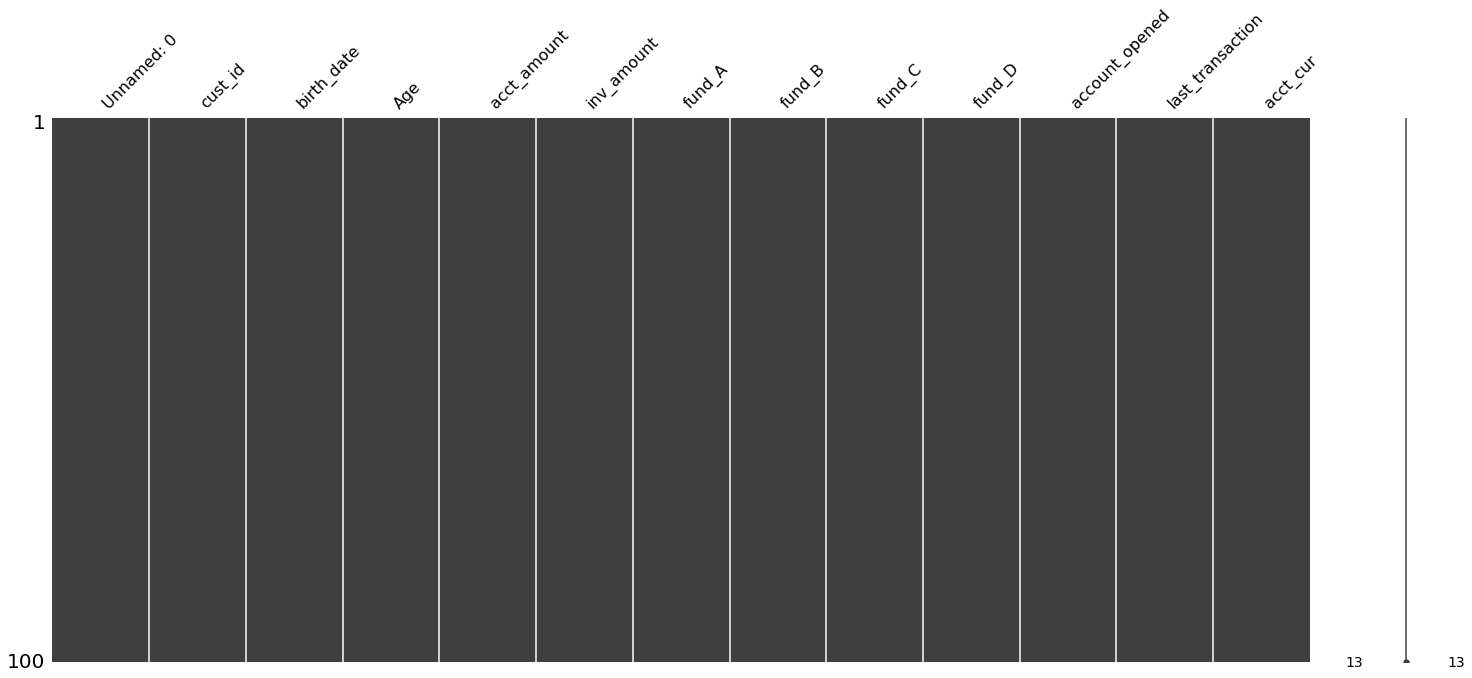

In [25]:
import missingno as msno
import matplotlib.pyplot as plt
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

 :3 ok. see exercise

In [ ]:

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted =banking.sort_values(by='Age')
print(banking_sorted)
msno.matrix(banking_sorted)
plt.show()

#### Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

Instructions
100 XP
Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna()

In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

### Comparing Strings
#### The cutoff point
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's process.extract() function by finding the similarity score of the most distant typo of each category.

In [ ]:
pip install fuzzywuzzy

In [5]:
# Import process from fuzzywuzzy
from fuzzywuzzy import fuzz,process
restaurants=pd.read_csv('G:\\datacamp\\13. Cleaning Data in Python\\New folder\\restaurants_L2_dirty.csv')

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()

print(unique_types)
print(len(unique_types))



C:\Users\hp\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']
33


In [6]:
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

print(process.extract('japanese', unique_types, limit = len(unique_types)))
print(process.extract('russian', unique_types, limit = len(unique_types)))
print(process.extract('mexican', unique_types, limit = len(unique_types)))
print(process.extract('vietnamese', unique_types, limit = len(unique_types)))
print(process.extract('indonesian', unique_types, limit = len(unique_types)))
print(process.extract('french', unique_types, limit = len(unique_types)))
print(process.extract('chinese', unique_types, limit = len(unique_types)))


[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

#### Remapping categories II
In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each is formatted like:

(closest match, similarity score, index of match)
The restaurants DataFrame is in your environment, and you have access to a categories list containing the correct cuisine types ('italian', 'asian', and 'american').

In [ ]:
categories=['asian','american','italian','japanese','russian','mexican','vietnamese','indonesian','french','chinese']

In [ ]:
# Iterate through categories
for cuisine in categories:  
    
  # Create a list of matches, comparing cuisine with the cuisine_type column
   matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))
  # print(matches)
 

  # Iterate through the list of matches
for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['type'].unique())

###see example